# Breakdown of this notebook:
1) **Importing the Libraries**

2) **Loading the dataset**

3) **Understanding the Attrition Problem and the Dataset**

4) **Data Visualization:**   
   - Plot a correlation map for all numeric variables
   - Overtime
   - Marital Status
   - Job Role
   - Gender
   - Education Field
   - Department
   - Buisness Travel
   - Relation between Overtime and Age
   - Total Working Years
   - Education Level
   - Number of Companies Worked
   - Distance from Home



## Importing the Libraries

In [113]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import os
#print(os.listdir("../input"))
import warnings
warnings.filterwarnings("ignore")

# Understanding the Attrition Problem and the Dataset

 HR Analytics helps us with interpreting organizational data. It finds out the people-related trends in the data and helps the HR Department take the appropriate steps to keep the organization running smoothly and profitably.Attrition is a corporate setup is one of the complex challenges that the people managers and the HRs personnel have to deal with. 
 
 Interestingly, machine learning models can be deployed to predict potential attrition cases, thereby helping the appropriate HR Personnel take the necessary steps to retain the employee.

## Loading the Dataset

In [114]:
data=pd.read_excel(r'C:\Users\KIRAN\Desktop\Learning\Dashboard\MLAlgos\HR-Employee-Attrition.xlsx')

### Print first 10 datapoints

In [3]:
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Getting information about the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Describe the dataset

In [5]:
data.describe().T 
# Generate descriptive statistics that summarize the central tendency,dispersion and shape of a dataset's distribution

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


## Plot a correlation map for all numeric variables

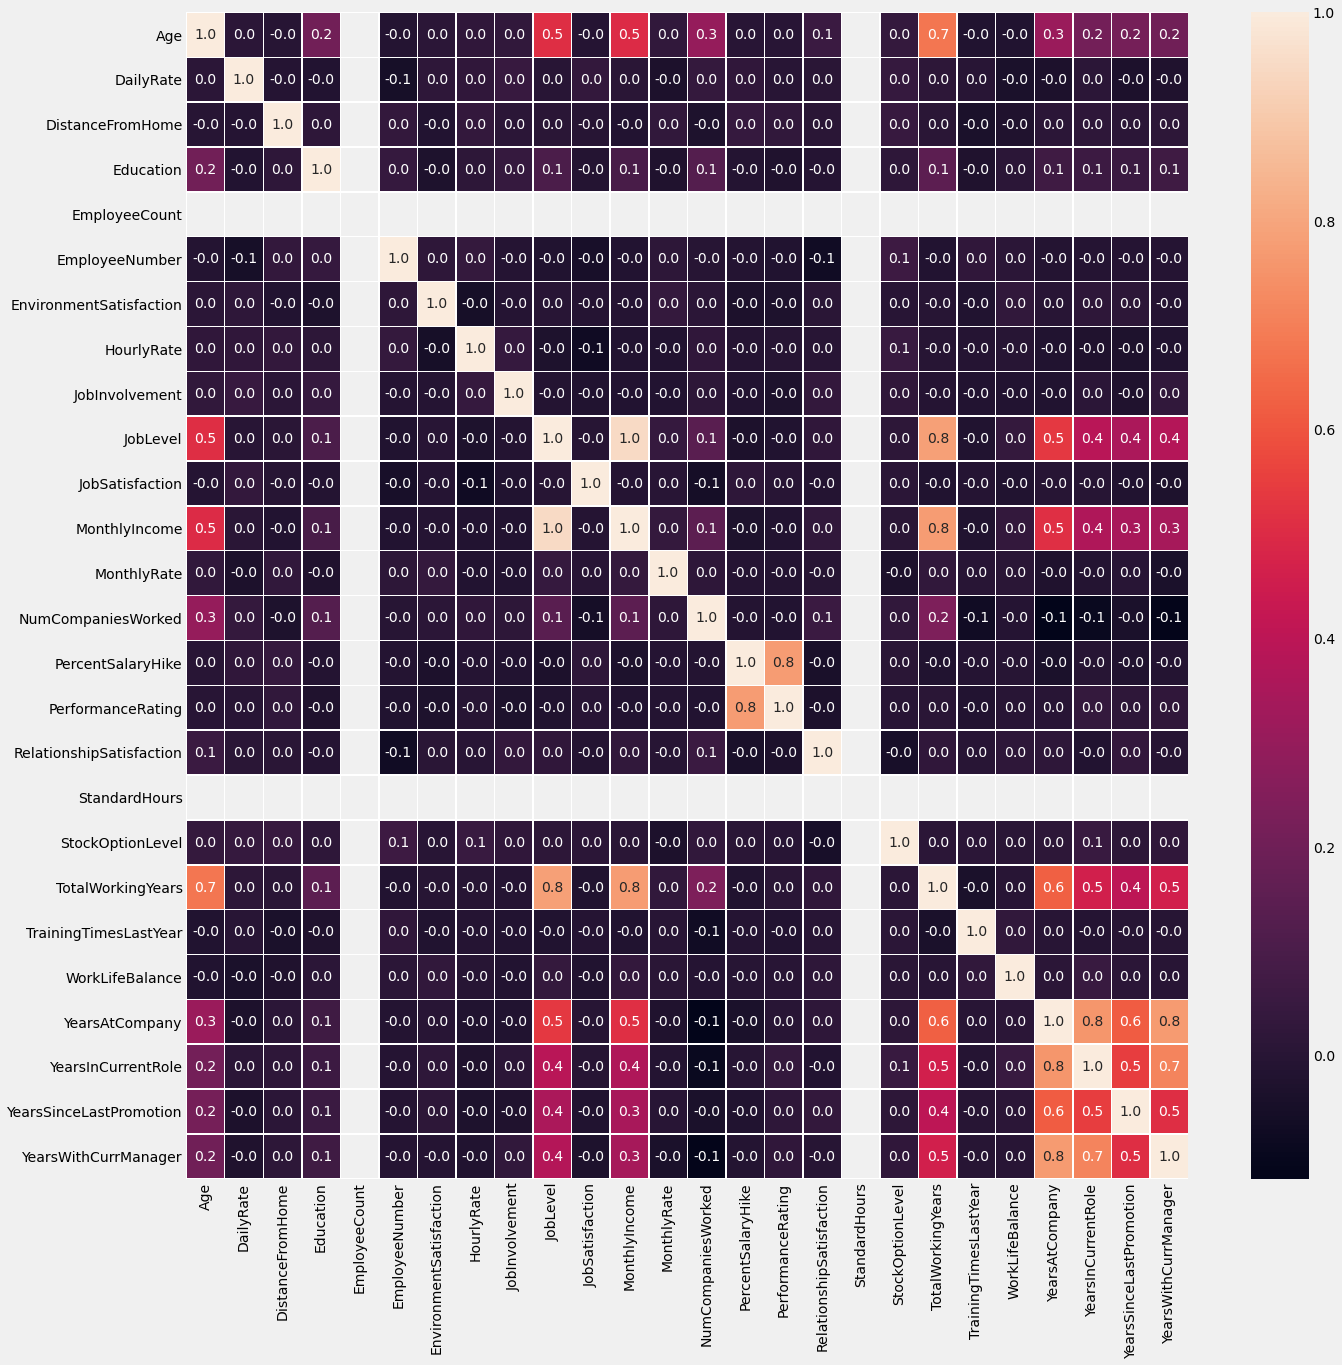

In [165]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

###### We'd now eplore the number of people based on different criteria to see which criteria is the dominat one for attrition

Text(0.5, 1.0, 'OverTime')

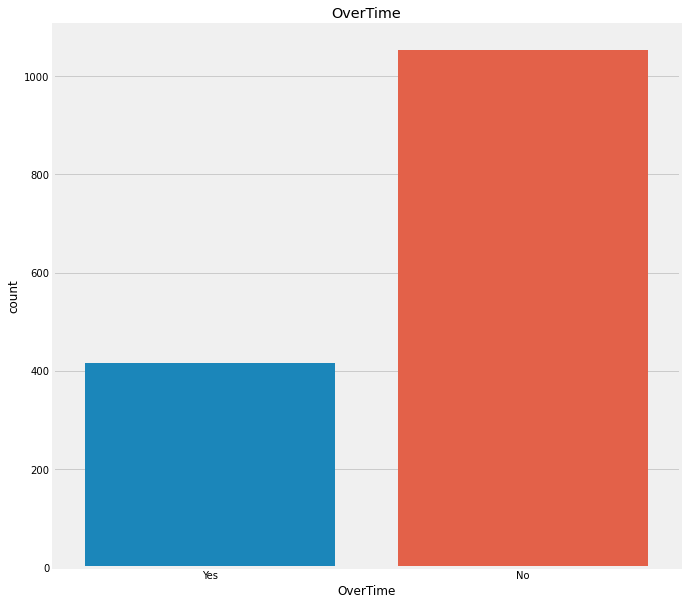

In [6]:
# count of people doing overtime
sns.countplot(data['OverTime'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('OverTime')

the Count of people doing overtime < the count of people not doing overtime

Text(0.5, 1.0, 'Marital Status')

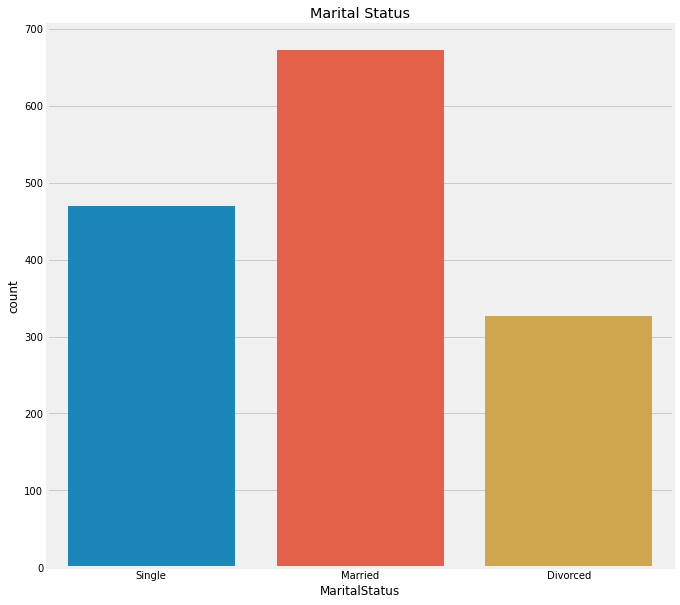

In [7]:
#count of people based on their marital status
sns.countplot(data['MaritalStatus'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Marital Status')

Text(0.5, 1.0, 'Job Role')

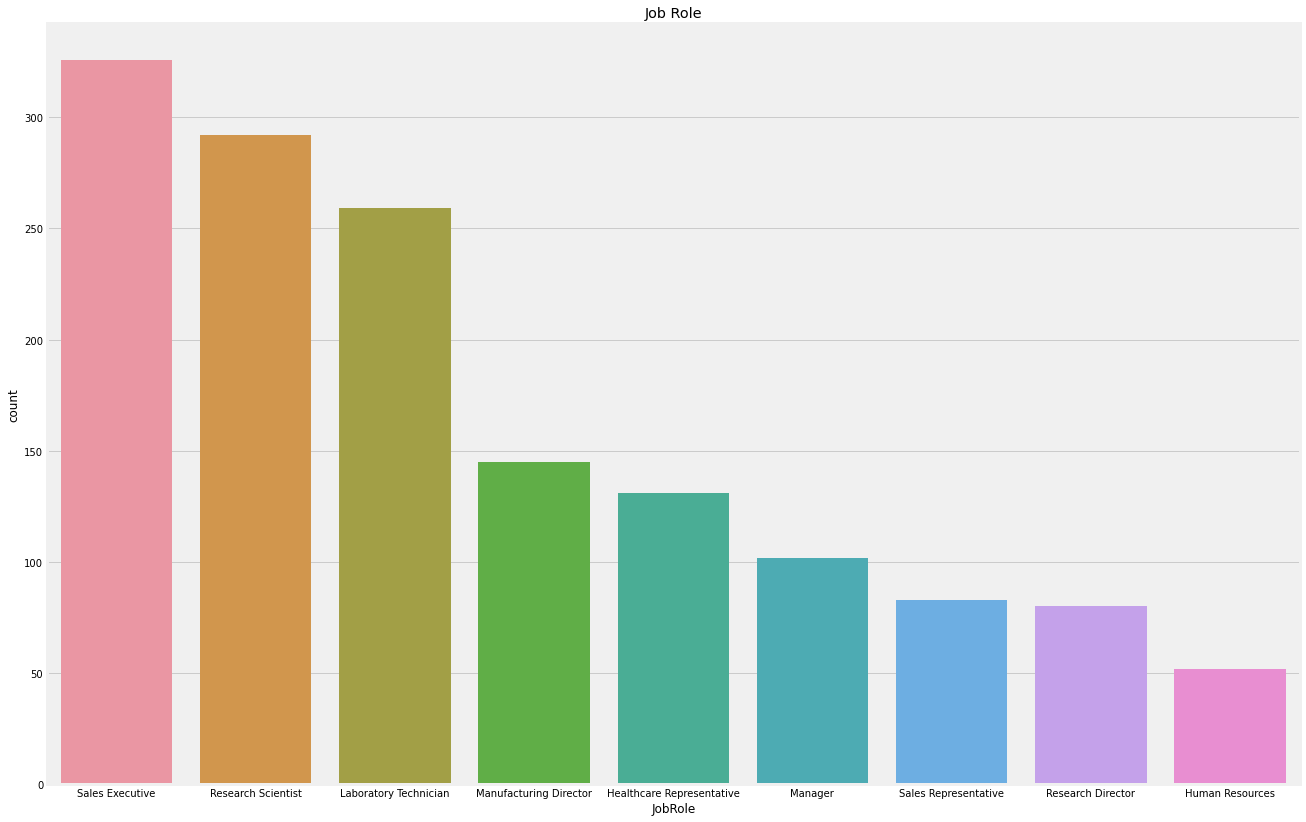

In [8]:
#count of people based on their Jobrole
sns.countplot(data['JobRole'])
fig = plt.gcf()
fig.set_size_inches(20,14)
plt.title('Job Role')

Text(0.5, 1.0, 'Gender')

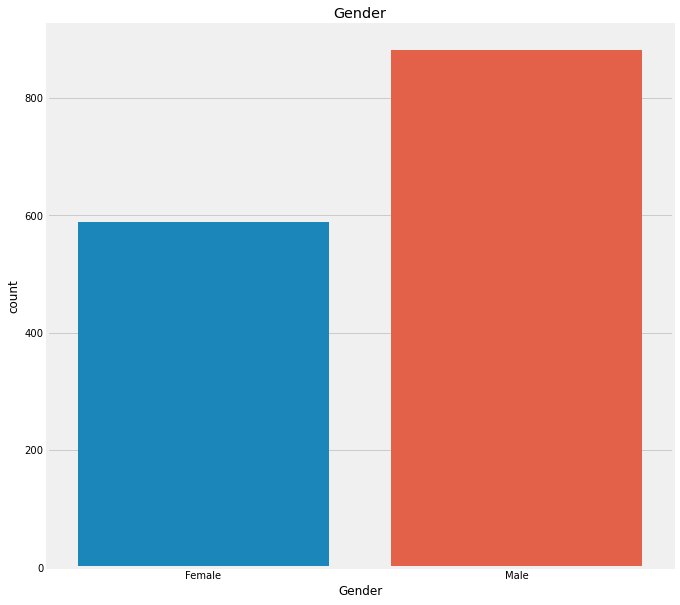

In [9]:
#count of people based on their Gender
sns.countplot(data['Gender'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Gender')

Text(0.5, 1.0, 'Education Field')

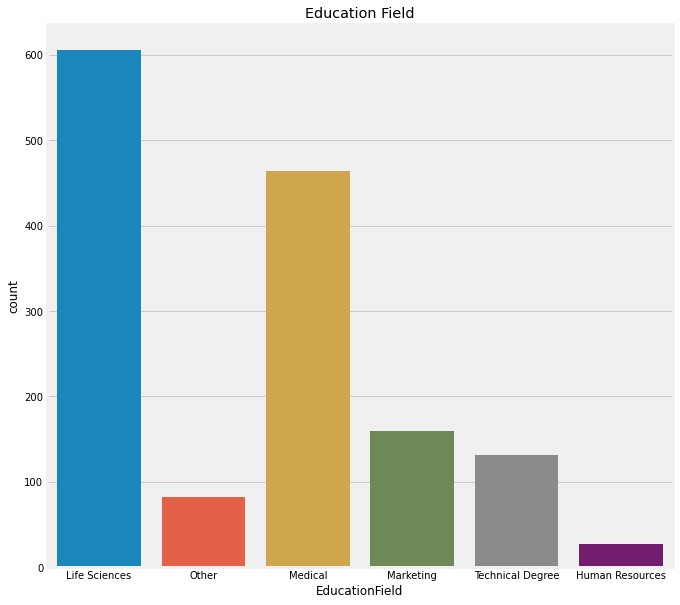

In [10]:
#count of people based on their field of education
sns.countplot(data['EducationField'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Education Field')

Text(0.5, 1.0, 'Department')

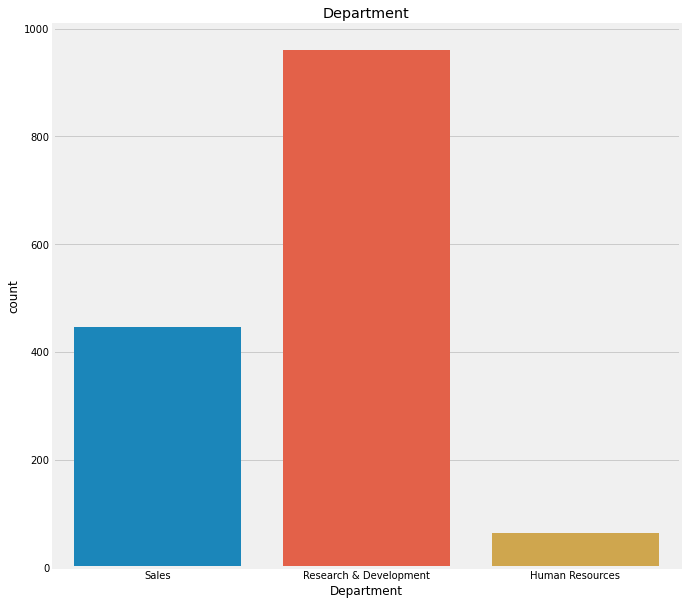

In [11]:
#count of people based on the department in which they work
sns.countplot(data['Department'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Department')

Text(0.5, 1.0, 'Business travel')

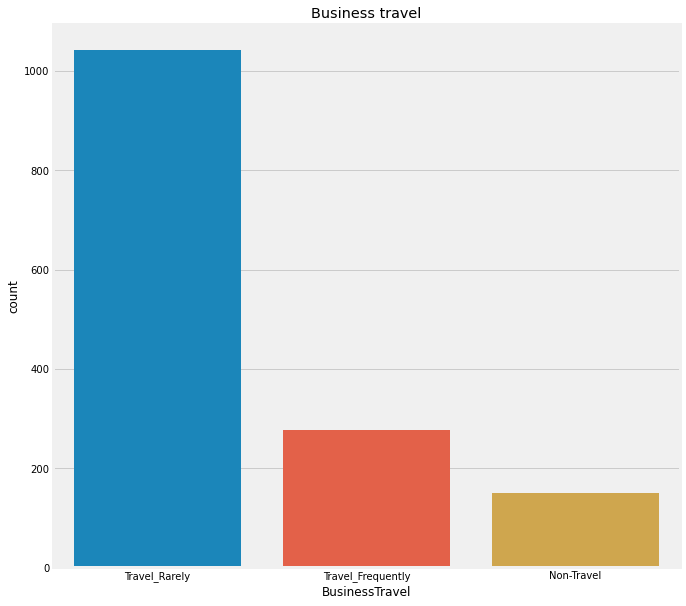

In [12]:
#count of people based on their Travel Frequency
sns.countplot(data['BusinessTravel'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Business travel')

In [17]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [18]:
# creating a dataframe that shows values based on grouping by age
age=pd.DataFrame(data.groupby("Age")[["MonthlyIncome","Education","JobLevel","JobInvolvement","PerformanceRating","JobSatisfaction","EnvironmentSatisfaction","RelationshipSatisfaction","WorkLifeBalance","DailyRate","MonthlyRate"]].mean())
age.head()

,MonthlyIncome,Education,JobLevel,JobInvolvement,PerformanceRating,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,WorkLifeBalance,DailyRate,MonthlyRate
Age,,,,,,,,,,,
18,1518.375000,2.500000,1.000,2.875000,3.000000,3.250000,2.750000,3.125000,3.000000,747.625000,14476.000000
19,2075.000000,2.111111,1.000,2.444444,3.444444,2.555556,2.444444,2.888889,3.222222,548.444444,15119.666667
20,2539.363636,2.636364,1.000,2.636364,3.000000,2.636364,3.181818,2.363636,2.909091,819.454545,16480.909091
21,2491.461538,1.615385,1.000,2.692308,3.153846,2.692308,2.692308,2.692308,2.769231,762.846154,17268.923077
22,2950.000000,1.812500,1.125,2.750000,3.250000,2.937500,2.812500,2.250000,2.750000,806.937500,14424.125000


In [19]:
age["Count"]=data.Age.value_counts(dropna=False) # adding new column to age
age.reset_index(level=0, inplace=True)
age.head()

,Age,MonthlyIncome,Education,JobLevel,JobInvolvement,PerformanceRating,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,WorkLifeBalance,DailyRate,MonthlyRate,Count
0,18,1518.375000,2.500000,1.000,2.875000,3.000000,3.250000,2.750000,3.125000,3.000000,747.625000,14476.000000,8
1,19,2075.000000,2.111111,1.000,2.444444,3.444444,2.555556,2.444444,2.888889,3.222222,548.444444,15119.666667,9
2,20,2539.363636,2.636364,1.000,2.636364,3.000000,2.636364,3.181818,2.363636,2.909091,819.454545,16480.909091,11
3,21,2491.461538,1.615385,1.000,2.692308,3.153846,2.692308,2.692308,2.692308,2.769231,762.846154,17268.923077,13
4,22,2950.000000,1.812500,1.125,2.750000,3.250000,2.937500,2.812500,2.250000,2.750000,806.937500,14424.125000,16


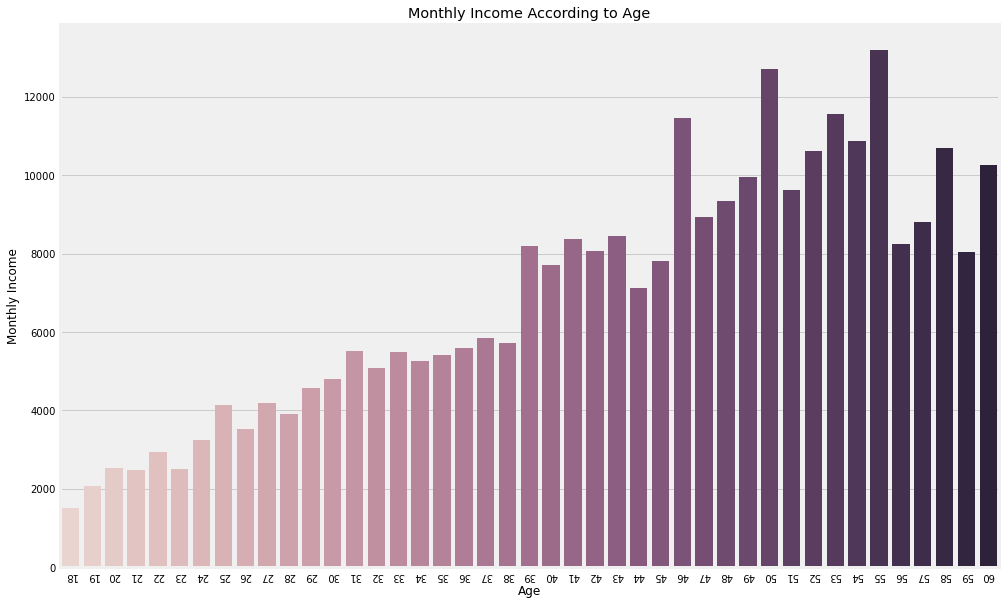

In [20]:
# showing monthly income according to age
plt.figure(figsize=(15,10))
ax=sns.barplot(x=age.Age,y=age.MonthlyIncome,palette = sns.cubehelix_palette(len(age.index)))
plt.xticks(rotation=180)
plt.xlabel("Age")
plt.ylabel("Monthly Income")
plt.title("Monthly Income According to Age")
plt.show()

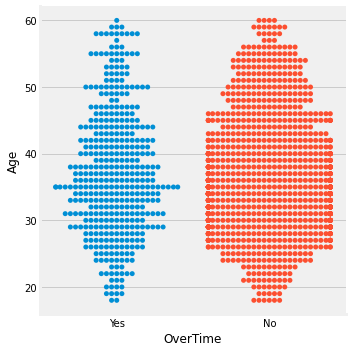

In [21]:
# analyzing the age group of the peole doing overtime
sns.catplot(x="OverTime", y="Age", kind="swarm", data=data);

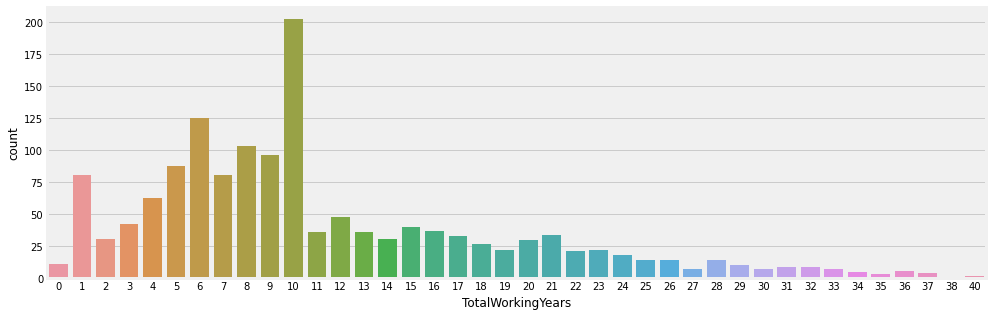

In [22]:
#count of people based on their total working years
plt.subplots(figsize=(15,5))
sns.countplot(data.TotalWorkingYears)

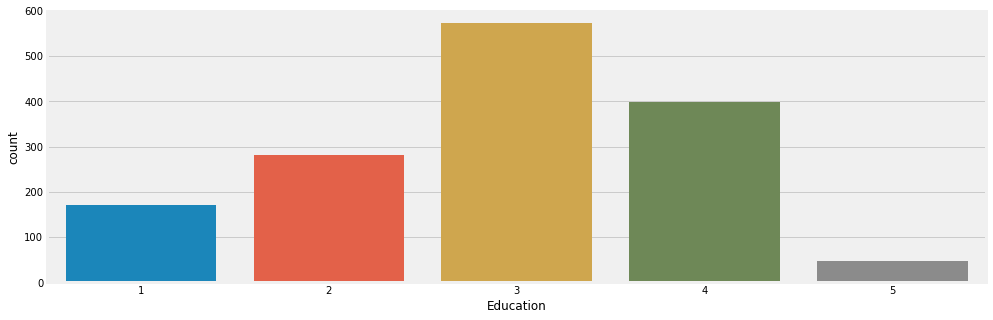

In [23]:
#count of people based on their Education
plt.subplots(figsize=(15,5))
sns.countplot(data.Education)

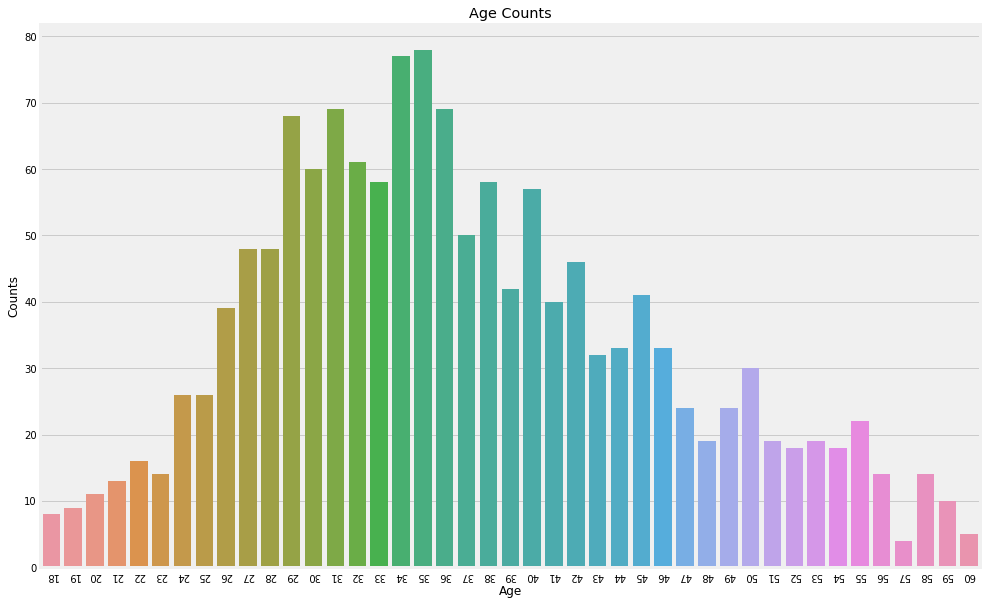

In [24]:
# showing the counts for different ages
plt.figure(figsize=(15,10))
ax=sns.barplot(x=age.Age,y=age.Count)
plt.xticks(rotation=180)
plt.xlabel("Age")
plt.ylabel("Counts")
plt.title("Age Counts")
plt.show()

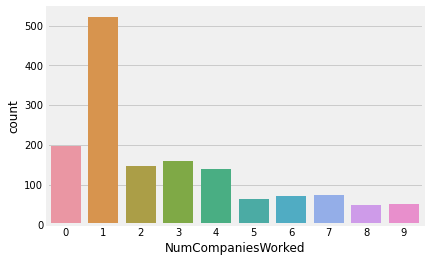

In [25]:
#count of people based on the number of companies they have worked for
sns.countplot(data.NumCompaniesWorked)

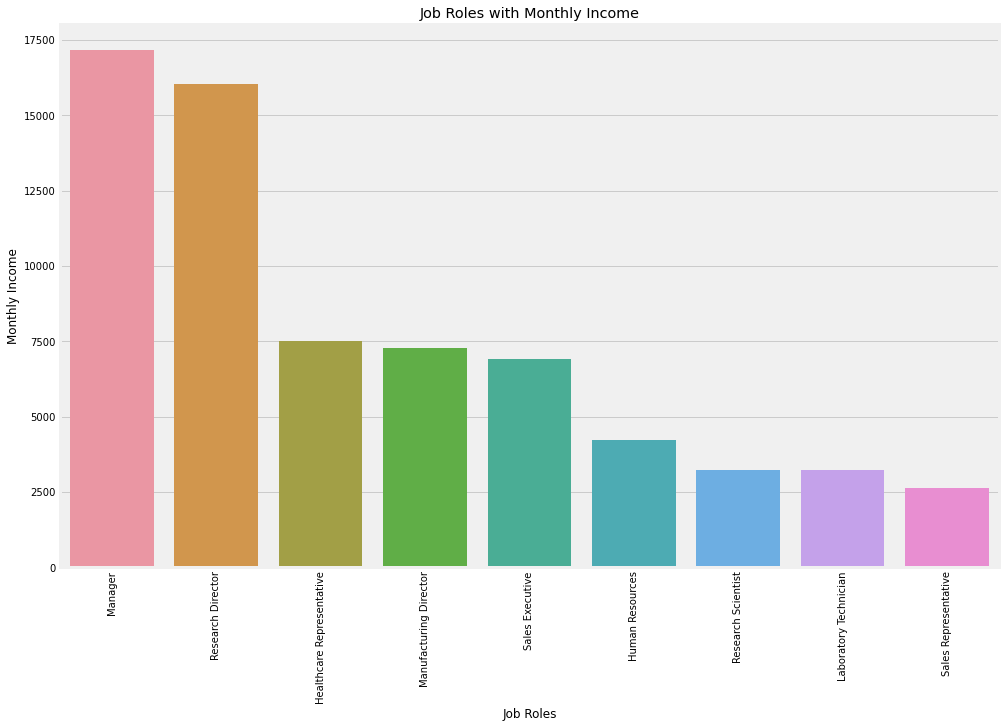

In [26]:
# creating a dataframe called income based on the jobroles
income=pd.DataFrame(data.groupby("JobRole").MonthlyIncome.mean().sort_values(ascending=False))
# showing the job roles with their monthly incomes
plt.figure(figsize=(15,10))
ax=sns.barplot(x=income.index,y=income.MonthlyIncome)
plt.xticks(rotation=90)
plt.xlabel("Job Roles")
plt.ylabel("Monthly Income")
plt.title("Job Roles with Monthly Income")
plt.show()

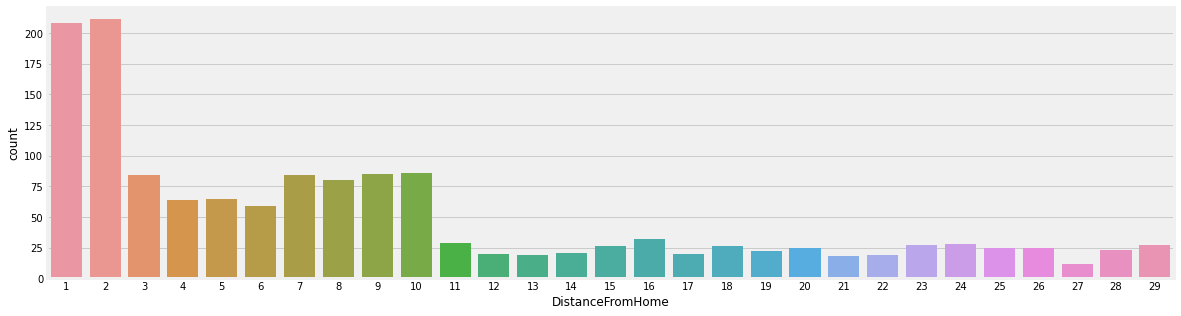

In [27]:
#count of people based on the distance from home they are working
plt.subplots(figsize=(18,5))
sns.countplot(data.DistanceFromHome)

In [28]:
# a dataframe with mean of the selected columns grouped by job role
jobrole=pd.DataFrame(data.groupby("JobRole")["PercentSalaryHike","YearsAtCompany","TotalWorkingYears","YearsInCurrentRole","WorkLifeBalance"].mean())
jobrole

,PercentSalaryHike,YearsAtCompany,TotalWorkingYears,YearsInCurrentRole,WorkLifeBalance
JobRole,,,,,
Healthcare Representative,15.450382,8.374046,14.068702,4.862595,2.702290
Human Resources,14.807692,5.326923,8.173077,3.134615,2.923077
Laboratory Technician,15.046332,5.019305,7.656371,3.200772,2.718147
Manager,15.137255,14.431373,24.549020,6.450980,2.774510
Manufacturing Director,15.593103,7.600000,12.786207,4.972414,2.765517
Research Director,14.950000,10.937500,21.400000,6.287500,2.862500
Research Scientist,15.448630,5.113014,7.715753,3.273973,2.678082
Sales Executive,14.889571,7.496933,11.101227,4.855828,2.803681
Sales Representative,15.674699,2.915663,4.674699,2.012048,2.891566


Index(['Life Sciences', 'Medical', 'Marketing', 'Technical Degree', 'Other',
       'Human Resources'],
      dtype='object')
[606 464 159 132  82  27]


Text(0.5, 1.0, 'Education Field Counts')

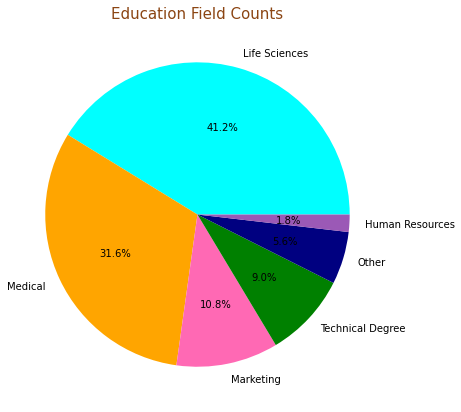

In [29]:
labels=data.EducationField.value_counts().index
print(labels)
colors=["cyan","orange","hotpink","green","navy","#9b59b6"]
sizes=data.EducationField.value_counts().values
print(sizes)
plt.figure(figsize=(7,7))
plt.pie(sizes,labels=labels,colors=colors,autopct="%1.1f%%")
plt.title("Education Field Counts",color="saddlebrown",fontsize=15)

In [30]:
# necessary imports
import time
import math
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sci
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from hyperopt import hp, tpe, Trials, STATUS_OK
from hyperopt import fmin

from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight') 
%matplotlib inline

In [31]:
ibm_df = data # copying data to ibm_df
ibm_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [32]:
ibm_df['Attrition'].size

1470

In [33]:
description = pd.DataFrame(index=['observations(rows)', 'percent missing', 'dtype', 'range'])
# creating a dataframe with custom indices
description

""
observations(rows)
percent missing
dtype
range


In [34]:
# initializing empty lists
numerical = []
categorical = []


for col in ibm_df.columns:
    obs = ibm_df[col].size
    p_nan = round(ibm_df[col].isna().sum()/obs, 2) # caluclating the number of missing values
    num_nan = f'{p_nan}% ({ibm_df[col].isna().sum()}/{obs})' # caluclating the number of missing values
    dtype = 'categorical' if ibm_df[col].dtype == object else 'numerical' # defining the criteria for numerical and categorical columns
    numerical.append(col) if dtype == 'numerical' else categorical.append(col) # preparing the list of categorcal and numerical columns
    rng = f'{len(ibm_df[col].unique())} labels' if dtype == 'categorical' else f'{ibm_df[col].min()}-{ibm_df[col].max()}' # the range of values in the columns
    description[col] = [obs, num_nan, dtype, rng]

In [35]:
missing_data = pd.DataFrame({'total_missing': data.isnull().sum(), 'perc_missing': (data.isnull().sum()/data.shape[0])*100})
missing_data

,total_missing,perc_missing
Age,0,0.0
Attrition,0,0.0
BusinessTravel,0,0.0
DailyRate,0,0.0
Department,0,0.0
DistanceFromHome,0,0.0
Education,0,0.0
EducationField,0,0.0
EmployeeCount,0,0.0
EmployeeNumber,0,0.0


In [36]:
numerical.remove('EmployeeCount') # removing EmployeeCount from numerical columns
numerical.remove('StandardHours') # removing StandardHours from numerical columns
pd.set_option('display.max_columns', 100) # displaying 100 columns atmost
display(description)
display(ibm_df.head())

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
observations(rows),1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470
percent missing,0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470)
dtype,numerical,categorical,categorical,numerical,categorical,numerical,numerical,categorical,numerical,numerical,numerical,categorical,numerical,numerical,numerical,categorical,numerical,categorical,numerical,numerical,numerical,categorical,categorical,numerical,numerical,numerical,numerical,numerical,numerical,numerical,numerical,numerical,numerical,numerical,numerical
range,18-60,2 labels,3 labels,102-1499,3 labels,1-29,1-5,6 labels,1-1,1-2068,1-4,2 labels,30-100,1-4,1-5,9 labels,1-4,3 labels,1009-19999,2094-26999,0-9,1 labels,2 labels,11-25,3-4,1-4,80-80,0-3,0-40,0-6,1-4,0-40,0-18,0-15,0-17


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [37]:
lgb_data = ibm_df.copy()
lgb_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [38]:
categorical

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [39]:
lgb_dummy = pd.get_dummies(lgb_data[categorical], drop_first=True) # creating dummy values for categoriccal columns
lgb_dummy.head()

,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [40]:
lgb_data = pd.concat([lgb_dummy, lgb_data], axis=1) # concatenating dummy columns to the original dataframe
lgb_data.head()

,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [41]:
lgb_data.drop(columns = categorical, inplace=True) # dropping the old categorical columns
lgb_data.head()

,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


In [42]:
lgb_data.rename(columns={'Attrition_Yes': 'Attrition'}, inplace=True) # renaming the column
lgb_data.head()

,Attrition,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


In [43]:
y_df = lgb_data['Attrition'].reset_index(drop=True) #  creating the label column
display(y_df.head())


0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: uint8

In [44]:
x_df = lgb_data.drop(columns='Attrition') # selecting the feature columns
x_df.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


In [45]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x_df, y_df, test_size=0.20) # splitting the training and test data

In [46]:
print('Sample Training Data')
display(train_x.head())
print('Sample Test Data')
display(test_x.head())

Sample Training Data


,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
220,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,36,1396,5,2,1,304,4,62,3,2,2,5914,9945,8,16,3,4,80,0,16,3,4,13,11,3,7
578,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,38,240,2,4,1,803,1,75,4,2,1,5980,26085,6,12,3,4,80,0,17,2,3,15,7,4,12
515,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,35,727,3,3,1,704,3,41,2,1,3,1281,16900,1,18,3,3,80,2,1,3,3,1,0,0,0
1328,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,27,728,23,1,1,1864,2,36,2,2,3,3540,7018,1,21,4,4,80,1,9,5,3,9,8,5,8
661,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,43,177,8,3,1,920,1,55,3,2,2,4765,23814,4,21,4,3,80,1,4,2,4,1,0,0,0


Sample Test Data


,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
447,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,35,619,1,3,1,600,2,85,3,2,3,4717,18659,9,11,3,3,80,0,15,2,3,11,9,6,9
1183,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,36,1040,3,2,1,1664,4,79,4,2,1,6842,26308,6,20,4,1,80,1,13,3,3,5,4,0,4
842,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,28,1485,12,1,1,1175,3,79,3,1,4,2515,22955,1,11,3,4,80,0,1,4,2,1,1,0,0
1037,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,45,1448,29,3,1,1465,2,55,3,3,4,9380,14720,4,18,3,4,80,2,10,4,4,3,1,1,2
627,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,52,890,25,4,1,867,3,81,2,4,4,13826,19028,3,22,4,3,80,0,31,3,3,9,8,0,0


In [47]:
print('Sample Training Labels')
display(train_y.head())
print('Sample Test Labels')
display(test_y.head())

Sample Training Labels


220     0
578     0
515     0
1328    0
661     0
Name: Attrition, dtype: uint8

Sample Test Labels


447     0
1183    0
842     1
1037    0
627     0
Name: Attrition, dtype: uint8

# Feature Selection

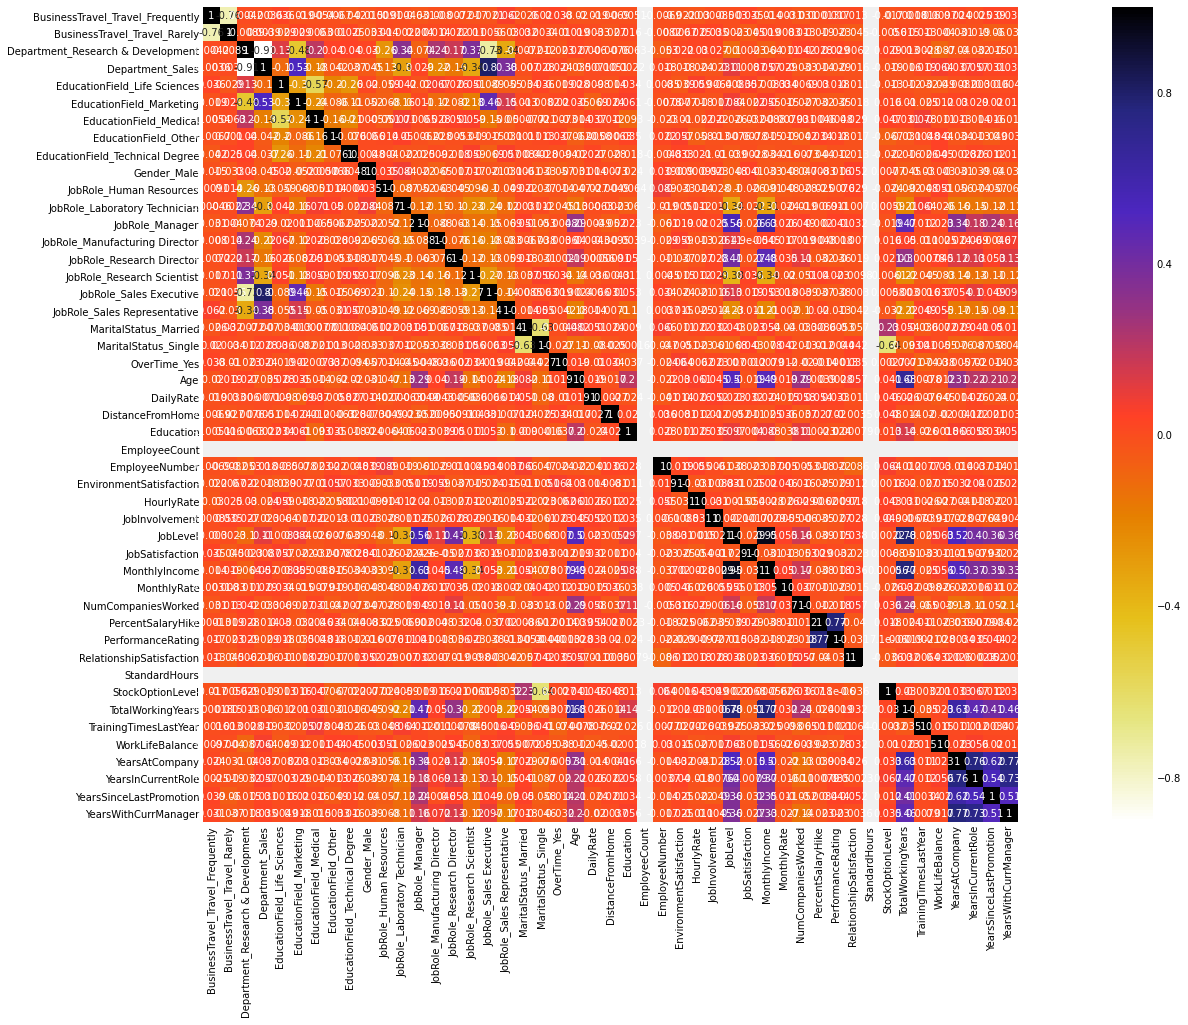

In [48]:

import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(30,15))
cor = train_x.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r,square=True)
plt.show()

In [49]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [50]:
corr_features = correlation(train_x, 0.6)
len(set(corr_features))

12

In [51]:
corr_features

{'BusinessTravel_Travel_Rarely',
 'Department_Sales',
 'JobRole_Sales Executive',
 'MaritalStatus_Single',
 'MonthlyIncome',
 'PerformanceRating',
 'StockOptionLevel',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager'}

In [52]:
test_x.drop(corr_features,axis=1)
test_x.drop(corr_features,axis=1)

,BusinessTravel_Travel_Frequently,Department_Research & Development,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Representative,MaritalStatus_Married,OverTime_Yes,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StandardHours,TrainingTimesLastYear,WorkLifeBalance
447,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,35,619,1,3,1,600,2,85,3,2,3,18659,9,11,3,80,2,3
1183,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,36,1040,3,2,1,1664,4,79,4,2,1,26308,6,20,1,80,3,3
842,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,28,1485,12,1,1,1175,3,79,3,1,4,22955,1,11,4,80,4,2
1037,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1,45,1448,29,3,1,1465,2,55,3,3,4,14720,4,18,4,80,4,4
627,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,52,890,25,4,1,867,3,81,2,4,4,19028,3,22,3,80,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,55,282,2,2,1,1336,4,58,1,5,3,6992,4,14,4,80,5,3
1114,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,48,1108,15,4,1,1576,3,65,3,1,1,16530,8,12,4,80,3,2
564,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,45,954,2,2,1,783,2,46,1,2,3,12388,0,13,1,80,3,3
30,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,33,924,2,3,1,39,3,78,3,1,4,6670,4,11,4,80,3,3


In [53]:
test_x.shape

(294, 47)

In [54]:

import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
x_df.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


In [55]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x_df,y_df)

In [56]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_df.columns)

In [57]:

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [58]:
featureScores

,Specs,Score
0,BusinessTravel_Travel_Frequently,1.581662e+01
1,BusinessTravel_Travel_Rarely,1.047857e+00
2,Department_Research & Development,3.702916e+00
3,Department_Sales,6.694465e+00
4,EducationField_Life Sciences,9.240444e-01
5,EducationField_Marketing,4.079154e+00
6,EducationField_Medical,2.222133e+00
7,EducationField_Other,4.446057e-01
8,EducationField_Technical Degree,6.435860e+00
9,Gender_Male,5.100865e-01


In [59]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features


                   Specs          Score
32         MonthlyIncome  127922.293694
33           MonthlyRate    1196.633553
22             DailyRate     956.580494
40     TotalWorkingYears     230.721618
43        YearsAtCompany     142.100054
44    YearsInCurrentRole     117.522596
46  YearsWithCurrManager     110.671534
21                   Age      84.155277
20          OverTime_Yes      63.845067
23      DistanceFromHome      63.772142


In [60]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x_df,y_df)

ExtraTreesClassifier()

In [61]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.01928557 0.01266391 0.01013278 0.01090664 0.01538988 0.01085103
 0.01571483 0.00664367 0.0119717  0.01967268 0.00577412 0.01691058
 0.00409133 0.00592556 0.00239373 0.010459   0.00939932 0.01301587
 0.01516515 0.02710307 0.06373425 0.03616807 0.02901126 0.03204039
 0.02478311 0.         0.02867578 0.03264788 0.02726096 0.02919668
 0.02720934 0.03204919 0.0366387  0.02783364 0.02927527 0.02614898
 0.01188658 0.02820417 0.         0.02785959 0.03519002 0.02362247
 0.03137426 0.03275104 0.02837309 0.02509444 0.02950044]


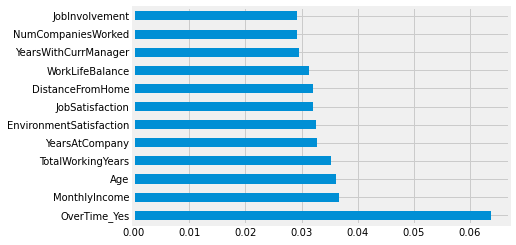

In [62]:
feat_importances = pd.Series(model.feature_importances_, index=x_df.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [63]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features


                   Specs          Score
32         MonthlyIncome  127922.293694
33           MonthlyRate    1196.633553
22             DailyRate     956.580494
40     TotalWorkingYears     230.721618
43        YearsAtCompany     142.100054
44    YearsInCurrentRole     117.522596
46  YearsWithCurrManager     110.671534
21                   Age      84.155277
20          OverTime_Yes      63.845067
23      DistanceFromHome      63.772142


In [64]:
dd=featureScores.nlargest(10,'Score')
dd

,Specs,Score
32,MonthlyIncome,127922.293694
33,MonthlyRate,1196.633553
22,DailyRate,956.580494
40,TotalWorkingYears,230.721618
43,YearsAtCompany,142.100054
44,YearsInCurrentRole,117.522596
46,YearsWithCurrManager,110.671534
21,Age,84.155277
20,OverTime_Yes,63.845067
23,DistanceFromHome,63.772142


In [65]:
df=x_df[dd.Specs]
df['attention']=y_df

In [66]:
df

,MonthlyIncome,MonthlyRate,DailyRate,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Age,OverTime_Yes,DistanceFromHome,attention
0,5993,19479,1102,8,6,4,5,41,1,1,1
1,5130,24907,279,10,10,7,7,49,0,8,0
2,2090,2396,1373,7,0,0,0,37,1,2,1
3,2909,23159,1392,8,8,7,0,33,1,3,0
4,3468,16632,591,6,2,2,2,27,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
1465,2571,12290,884,17,5,2,3,36,0,23,0
1466,9991,21457,613,9,7,7,7,39,0,6,0
1467,6142,5174,155,6,6,2,3,27,1,4,0
1468,5390,13243,1023,17,9,6,8,49,0,2,0


In [67]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [68]:
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.33, random_state=42)

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rf=RandomForestClassifier(n_estimators=250)

In [71]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=250)

In [72]:
ypred=rf.predict(X_test)

In [73]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [74]:
accuracy_score(y_test,ypred)

0.8497942386831275

##### here in precision 1 % is 0.13 so we should not check acc and clearly it is says that our dataset is imbalance and we hv to balance it

In [75]:
print(classification_report(ypred,y_test))        


              precision    recall  f1-score   support

           0       0.97      0.87      0.92       461
           1       0.16      0.44      0.23        25

    accuracy                           0.85       486
   macro avg       0.56      0.66      0.57       486
weighted avg       0.92      0.85      0.88       486



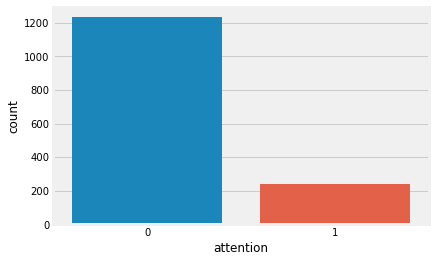

In [76]:
sns.countplot(df.attention)

In [77]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

Using TensorFlow backend.


In [78]:
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(x,y)

In [79]:
X_res.shape,y_res.shape


((2324, 10), (2324,))

In [80]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 1233, 1: 237})
Resampled dataset shape Counter({1: 1162, 0: 1162})


In [81]:
X_train, X_test, y_train, y_test=train_test_split(X_res, y_res, test_size=0.33, random_state=42)

In [82]:
rf.fit(X_train,y_train)
ypred=rf.predict(X_test)

In [83]:
accuracy_score(y_test,ypred)

0.8552803129074316

In [84]:
print(classification_report(ypred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       376
           1       0.87      0.84      0.86       391

    accuracy                           0.86       767
   macro avg       0.86      0.86      0.86       767
weighted avg       0.86      0.86      0.86       767



In [85]:
X_res

,MonthlyIncome,MonthlyRate,DailyRate,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Age,OverTime_Yes,DistanceFromHome
0,5993,19479,1102,8,6,4,5,41,1,1
1,5130,24907,279,10,10,7,7,49,0,8
2,2090,2396,1373,7,0,0,0,37,1,2
3,2909,23159,1392,8,8,7,0,33,1,3
4,3468,16632,591,6,2,2,2,27,0,2
...,...,...,...,...,...,...,...,...,...,...
2319,2473,26086,389,1,1,0,0,21,0,7
2320,2634,5895,759,4,4,4,3,31,0,10
2321,5195,4606,1070,8,5,2,3,40,1,17
2322,4586,24949,608,4,2,2,2,30,1,17


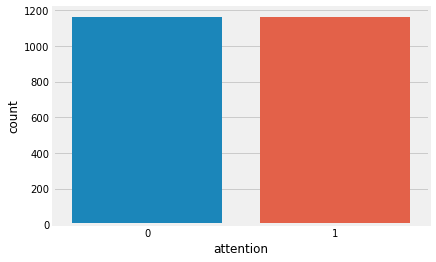

In [86]:
sns.countplot(y_res)

In [87]:
X_res.head()

,MonthlyIncome,MonthlyRate,DailyRate,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Age,OverTime_Yes,DistanceFromHome
0,5993,19479,1102,8,6,4,5,41,1,1
1,5130,24907,279,10,10,7,7,49,0,8
2,2090,2396,1373,7,0,0,0,37,1,2
3,2909,23159,1392,8,8,7,0,33,1,3
4,3468,16632,591,6,2,2,2,27,0,2


In [88]:
X_res.iloc[4].values

array([ 3468, 16632,   591,     6,     2,     2,     2,    27,     0,
           2], dtype=int64)

In [89]:
y_res[4]

0

In [90]:
rf.predict([[ 3468, 16632,   591,     6,     2,     2,     2,    27,     0,
           2]])

array([0], dtype=uint8)

In [91]:
cm=confusion_matrix(ypred,y_test)
cm

array([[327,  49],
       [ 62, 329]], dtype=int64)

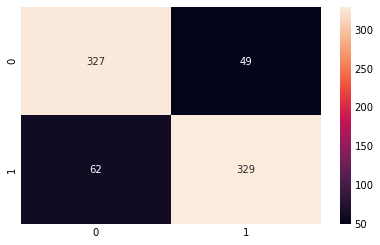

In [92]:
sns.heatmap(confusion_matrix(ypred,y_test),annot=True,fmt='d',)

# Tuning

In [93]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
est = RandomForestClassifier(n_jobs=-1)
rf_p_dist={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200,300,400,500],
              'max_features':randint(1,3),
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':randint(1,4),
              }
def hypertuning_rscv(est, p_distr, nbr_iter,X,y):
    rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=9)
    #CV = Cross-Validation ( here using Stratified KFold CV)
    rdmsearch.fit(X,y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

rf_parameters, rf_ht_score = hypertuning_rscv(est, rf_p_dist, 40, X_res,y_res)

In [94]:
rf_parameters

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 2,
 'min_samples_leaf': 1,
 'n_estimators': 200}

In [95]:
rf_ht_score

0.8817156026458353

In [105]:
rf=RandomForestClassifier(bootstrap= False,criterion='gini',
                          max_depth= None,max_features= 2,
                          min_samples_leaf= 1,n_estimators= 700)

In [106]:
rf.fit(X_train,y_train)
ypred=rf.predict(X_test)

In [107]:
accuracy_score(y_test,ypred)

0.8539765319426337

In [108]:
print(classification_report(ypred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       375
           1       0.87      0.84      0.85       392

    accuracy                           0.85       767
   macro avg       0.85      0.85      0.85       767
weighted avg       0.85      0.85      0.85       767



# Testing

In [109]:
X_res.iloc[2319].values

array([ 2473, 26086,   389,     1,     1,     0,     0,    21,     0,
           7], dtype=int64)

In [110]:
y_res[2319]

1

In [111]:
rf.predict([[ 2473, 26086,   389,     1,     1,     0,     0,    21,     0,
           7]])

array([1], dtype=uint8)